# Install Libraries

In [277]:
!pip install numpy
!pip install pandas
!pip install matplotlib.pyplot
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


# Import Libraries

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [279]:
url = "https://raw.githubusercontent.com/Raghavagr/Laptop_Price_Prediction/main/laptop_data.csv"
data = pd.read_csv(url, encoding='latin-1')

# Check Data set

In [280]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [281]:
data.shape

(1303, 12)

In [282]:
# Check whether null data is there or not
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data analysis

In [284]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')
data.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(7)
memory usage: 112.1+ KB


In [286]:
# Check cor related data for price
data.corr()['Price']

Unnamed: 0    0.067984
Inches        0.068197
Ram           0.743007
Weight        0.210370
Price         1.000000
Name: Price, dtype: float64

# Exploratory Data Analysis (EDA)
*EDA involves analyzing and visualizing the data to gain a deeper understanding of the dataset and identify any patterns, trends, or relationships among the variables.*

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


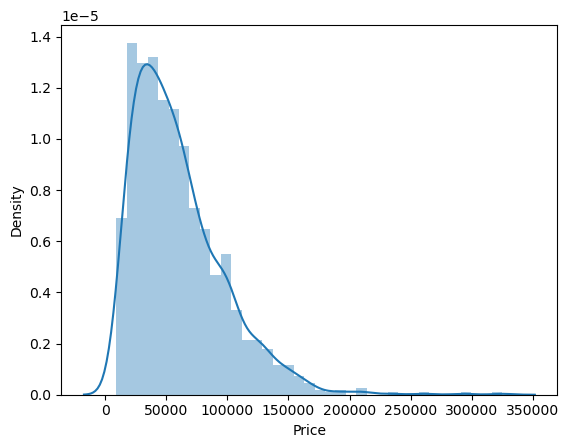

In [287]:
sns.distplot(data['Price'])
plt.show()
# When looking at this we can see that commodities with low prices are sold and purchased more than the branded ones.

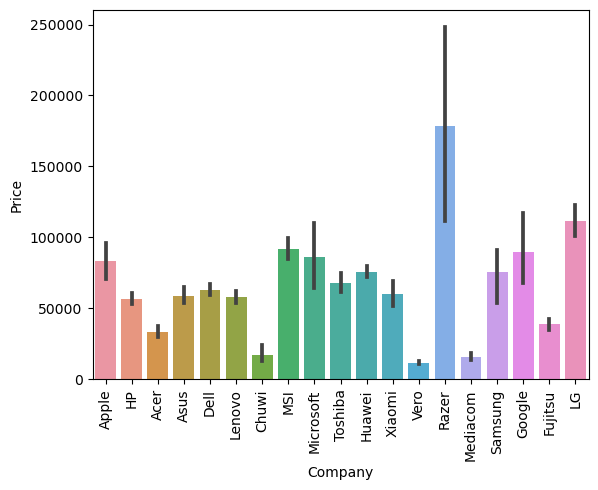

In [288]:
sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

# When looking this one we can see Razer, Apple, LG, Microsoft, Google, MSI laptops are expensive, and others are in the budget range.

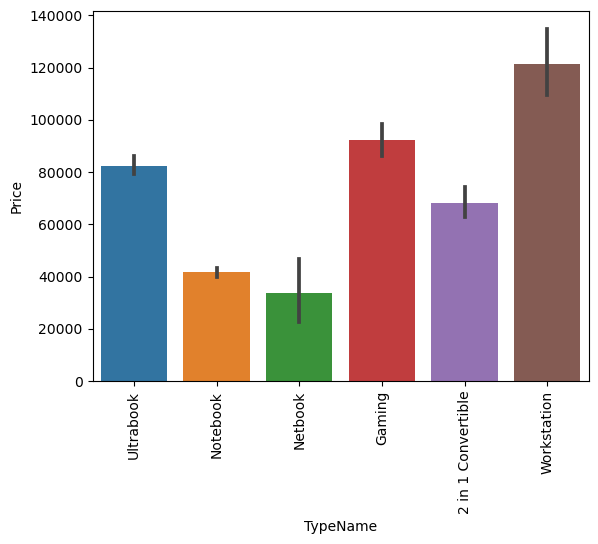

In [289]:
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

# When lokking at this we can see major people prefer notebook because it is under budget range and the same can be concluded from our data.

<AxesSubplot:xlabel='Inches', ylabel='Price'>

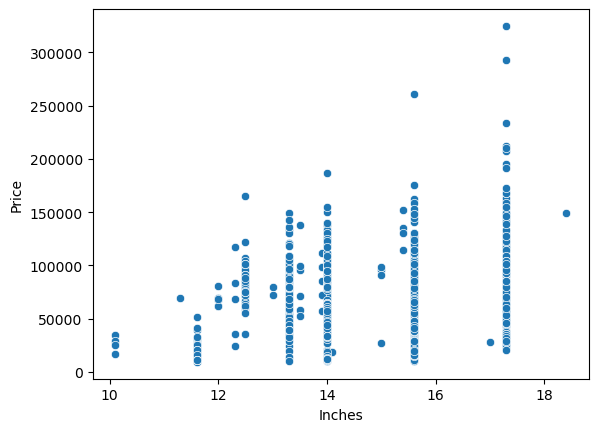

In [290]:
sns.scatterplot(x=data['Inches'],y=data['Price'])

# When both columns contain numerical values, a scatter plot is a more effective way to answer our question.
# The plot below indicates that there is a relationship between the price and size columns, but it is not a strong one.

# Feature Engineering and Preprocessing
*Feature engineering is a process to convert raw data to meaningful information. there are many methods that come under feature engineering like transformation, categorical encoding, etc. Now the columns we have are noisy so we need to perform some feature engineering steps.*

**1. Screen Resolution** - screen resolution contains lots of information. before any analysis first, we need to perform feature engineering over it. If you observe unique values of the column then we can see that all value gives information related to the presence of an IPS panel, are a laptop touch screen or not, and the X-axis and Y-axis screen resolution. So, we will extract the column into 3 new columns in the dataset.

In [291]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

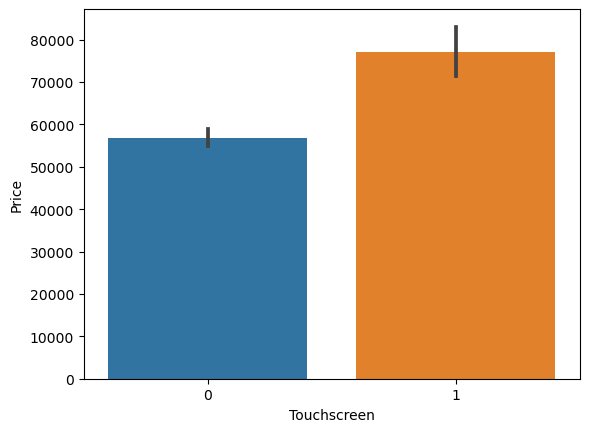

In [292]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
# sns.countplot(data['Touchscreen'])
sns.barplot(x=data['Touchscreen'],y=data['Price'])

<AxesSubplot:xlabel='Ips', ylabel='Price'>

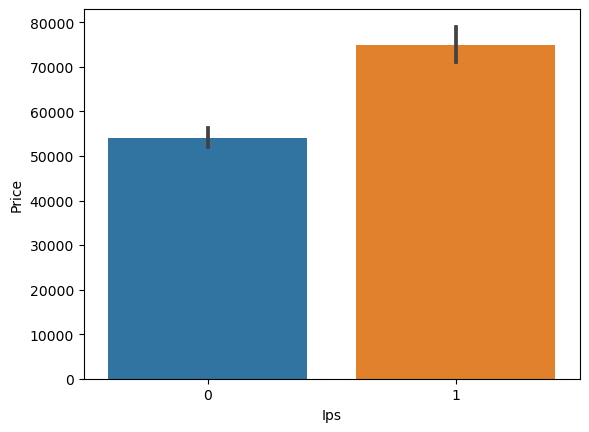

In [293]:
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['Ips'],y=data['Price'])

In [294]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

#Split the display size into X_res and Y_res columns

In [295]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [296]:
data.corr()['Price'].sort_values(ascending=False)
# When we looking at the correlation of column with price we can see that inches do not have a strong correlation but X and Y-axis resolution have a very strong resolution
# so we can take advantage of it and convert these three columns to a single column that is known as Pixel per inches(PPI). In the end, our goal is to improve the performance by having fewer features.

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Unnamed: 0     0.067984
Name: Price, dtype: float64

In [297]:
# Convert these three columns (X_res, Y_res and inches) into single column named PPI (Pixel per inches)
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

So now we can drop the extra columns which are not of use. At this point, we have started keeping the important columns in our dataset.

In [298]:
data.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

**2. CPU** - If we observe the CPU column then it also contains lots of information. The information it gives is about preprocessors in laptops and speed.

In [299]:
data['Cpu'].value_counts()
# This have 118 categories

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [300]:
# create new column and save first 3 data of one column. Ex:- Intel Core i7
data['cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) 

def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3' :
        return name
    else :
        if name.split()[0] == 'AMD' :
            return 'AMD'
        else:
            return 'Other'

data['cpu_name'] = data['cpu_name'].apply(set_processor)

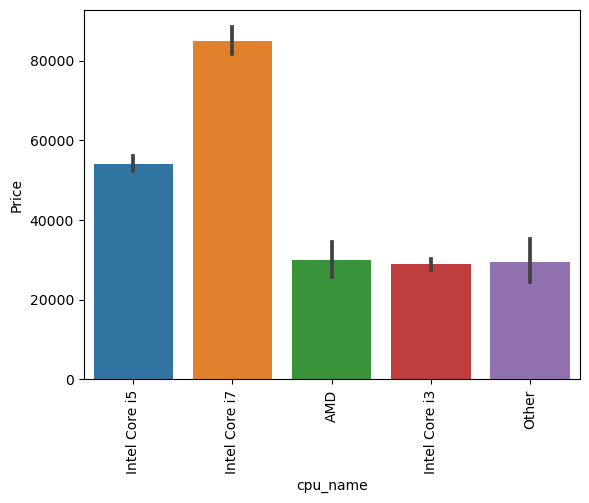

In [301]:
sns.barplot(x=data['cpu_name'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

# When looking at this we can see the price of i7 processor is high, then of i5 processor, i3 and AMD processor lies at the almost the same range. Hence price will depend on the preprocessor.

**3. Ram** - If you look at the plot, you can see that there is a strong positive correlation, or a linear relationship, between the price and the amount of RAM.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


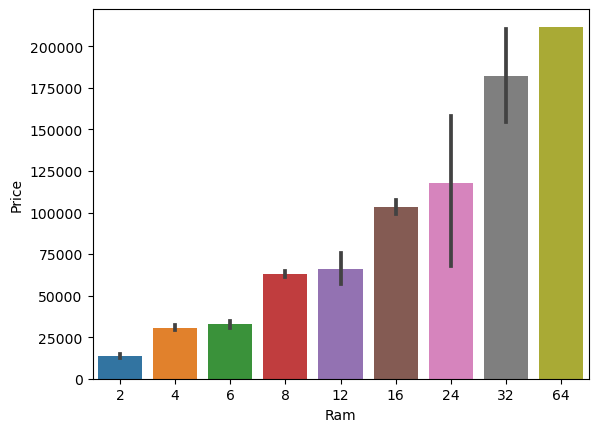

In [302]:
sns.barplot(data['Ram'], data['Price'])
plt.show()

**4. Memory** - Memory column is again a noisy column that gives an understanding of hard drives. many laptops came with HHD and SSD both, as well in some there is an external slot present to insert after purchase

In [303]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [304]:
# This will replace data like 4.0 GB to 4GB
data['Memory'] = data['Memory'].astype(str).replace('.0', '', regex=True)

data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '')

# 'Memory' column with the value "512GB SSD +  256GB SSD" will be split into two columns in the new DataFrame: "512GB SSD" and "256GB SSD".
new = data["Memory"].str.split("+", n = 1, expand = True)
data["first"]= new[0]
data["first"]=data["first"].str.strip()
data["second"]= new[1]
data["second"]=data["second"].str.strip()



# data["first"].fillna("0", inplace = True)
data["second"].fillna("0", inplace = True)

data["second"]

#binary encoding
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)



data['first'] = data['first'].str.replace(r'SSD', '')
data['first'] = data['first'].str.replace(r'Hybrid', '')
data['first'] = data['first'].str.replace(r'Flash Storage', '')
data['first'] = data['first'].str.replace(r'HDD', '')

data['second'] = data['second'].str.replace(r'SSD', '')
data['second'] = data['second'].str.replace(r'Hybrid', '')
data['second'] = data['second'].str.replace(r'Flash Storage', '')
data['second'] = data['second'].str.replace(r'HDD', '')




# #convert to numeric
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)


# #finalize the columns by keeping value
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

#Drop the un required columns
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

Now when we see the correlation of price then Hybrid and flash storage have very less or no correlation with a price. We will drop this column with CPU and memory which is no longer required.

In [305]:
data.drop(columns=['Hybrid','Flash_Storage','Memory','Cpu'],inplace=True)

In [306]:
data.head(5)

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_name,HDD,SSD
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


**5. GPU** - GPU(Graphical Processing Unit) has many categories in data. We are having which brand graphic card is there on a laptop

In [307]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [308]:
data['Gpu_Brand'] = data['Gpu'].apply(lambda x: " ".join(x.split()[0:1]))

data['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [309]:
# Remove the ARM column
data = data[data['Gpu_Brand'] != 'ARM']

data.shape

(1302, 15)

By applying the value counts function, a row containing an ARM GPU was identified and subsequently removed. After extracting the brand, the GPU column became redundant and was no longer required.

In [310]:
data.drop(columns=['Gpu'],inplace=True)

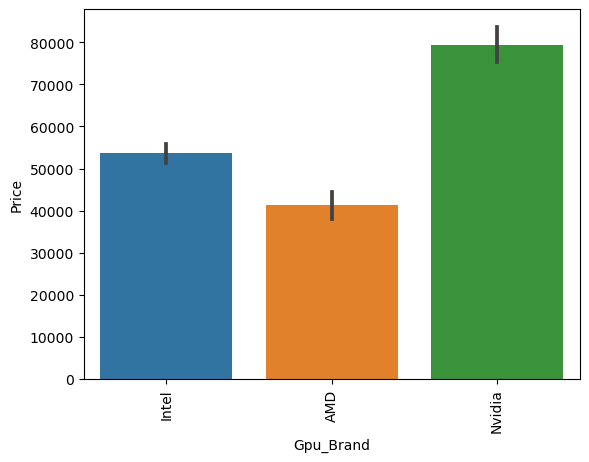

In [311]:
sns.barplot(x=data['Gpu_Brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

**6. Operating System Column** - There are many categories of operating systems. we will keep all windows categories in one, Mac in one, and remaining in others

In [312]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [313]:
def set_os(name):
    if name == 'Windows 10' or name == 'Windows 7' or name == 'Windows 10 S':
        return 'Windows'
    elif name == 'macOS' or name == 'Mac OS X':
        return 'Mac'
    elif name == 'Linux':
        return name
    else :
        return 'Others'
    
data['OpSys'] = data['OpSys'].apply(set_os)

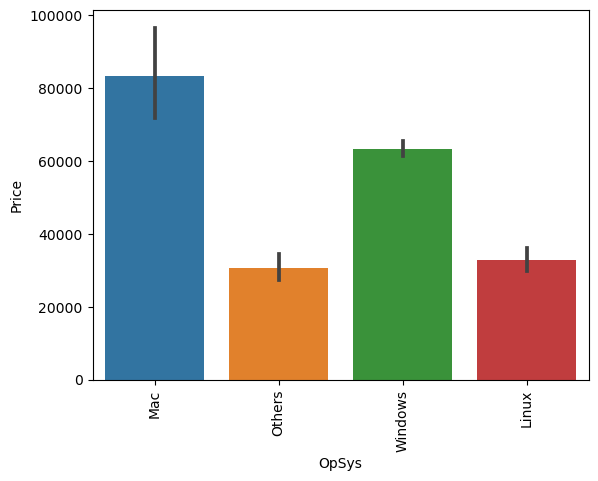

In [314]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [315]:
data = data.drop(columns = ['Unnamed: 0'])


In [316]:
data.head(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_name,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


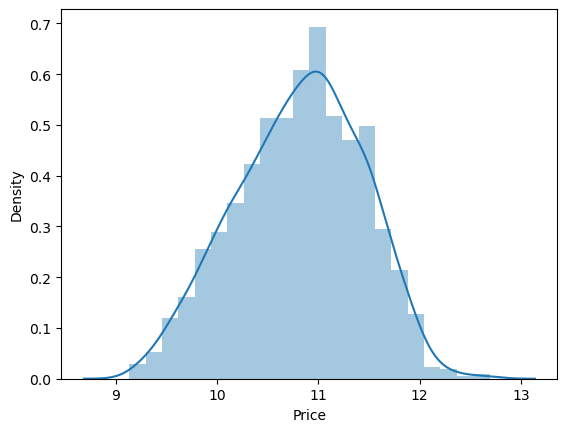

In [317]:
# Compared to the first diagram this diagram is much different.
sns.distplot(np.log(data['Price']))
plt.show()

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [321]:
X = data.drop(columns=['Price'])

y = np.log(data['Price'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

X.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,ppi,cpu_name,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [322]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

ValueError: could not convert string to float: 'Windows'

In [ ]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])

],remainder='passthrough')

step2 = LinearRegression(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

# One hot Encoding

In [ ]:
# data_encoded = pd.get_dummies(data)
# data_encoded.info()

In [ ]:
# data_encoded.head(2)

# Machine Learning Modeling for Laptop Price Prediction


1. linear regression
2. laso regsression
3. decision tree
4. random forest

In [ ]:
# # import libraries
# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score,mean_absolute_error
# from sklearn.linear_model import Ridge
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [ ]:
# # Divide the test data and train data
# X = data_encoded.drop('Price', axis =1) #Features 
# Y = data_encoded['Price'] #Label
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)
# X_train.shape, X_test.shape

In [ ]:
# X.head()

In [ ]:
# # This methods is used for check the accuracy of each model
# def model_acc(model):
#   model.fit(X_train, Y_train)
#   acc = model.score(X_test, Y_test)
#   print(str(model)+'-->'+str(acc))

In [ ]:
# # 1. linear reagression
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# model_acc(lr)

# # 2. lasso reagression
# from sklearn.linear_model import Lasso
# ls = Lasso()
# model_acc(ls)

# # 3. Decision tree reagression
# from sklearn.tree import DecisionTreeRegressor
# ds = DecisionTreeRegressor()
# model_acc(ds)

# # 4. Random forrest tree reagression
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# model_acc(rf)

# Train the dataset using random forest

In [ ]:
# # This is used for parameter tuning
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators':[10,50,100], 'criterion':['squared_error', 'absolute_error', 'poission']}
# grid_obj = GridSearchCV(estimator=rf , param_grid=parameters)

# # Train the dataset
# grid_fit = grid_obj.fit(X_train, Y_train)

# best_model_rm = grid_fit.best_estimator_

# best_model_rm


In [ ]:
# # Check the accuracy
# best_model_rm.score(X_test, Y_test)

In [ ]:
# import pickle
# data_encoded.to_csv("df.csv", index=False)
# pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
pip install streamlit